In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [16]:
df = pd.read_csv("./data/timing_table.txt", delimiter="\t", index_col=0)

In [17]:
df.dtypes

seconds_wall_clock    float64
reads_per_minute      float64
gbyte_memory          float64
percent_cpu             int64
cpu_hours             float64
tool                   object
threads                 int64
dtype: object

In [18]:
df.head()

,seconds_wall_clock,reads_per_minute,gbyte_memory,percent_cpu,cpu_hours,tool,threads
0,116.41,1.546259e+07,7.584920,2721,1.034756,utree,32
1,112.89,1.594472e+07,7.586948,2978,1.003467,utree,32
2,1979.34,9.093940e+05,7.273708,100,0.549817,utree,1
3,124.27,1.448459e+07,7.409492,1510,0.552311,utree,16
4,189.74,9.486666e+06,7.335080,773,0.421644,utree,8


In [24]:
#9235008 ./combined_seqs.fna
infile_gbytes = 9235008/1e6

In [71]:
df = df.sort_values("tool")

df_means = df.groupby("tool").mean()

tools = ["burst", "bowtie2", "centrifuge", "kraken", "utree"]
index_tools = dict(zip(tools, range(len(tools))))

df_means["index_tools"] = df_means.index.map(index_tools)


display_names = dict(zip(tools, ["BURST", "Bowtie2", "Centrifuge", "Kraken", "UTree"]))

df_means["display_names"] = df_means.index.map(display_names)

colors = dict(zip(tools, ["#1a1895", "#000000", "#0c5050", "#148d4a", "#bd86e8"]))

df_means["colors"] = df_means.index.map(colors)

markers = dict(zip(tools, ["s", "v", "o", "^", "d"]))

df_means["markers"] = df_means.index.map(markers)


In [82]:
df_means.display_names.values

array(['Bowtie2', 'BURST', 'Centrifuge', 'Kraken', 'UTree'], dtype=object)

In [112]:
def stylize_axes(ax):
    """Customize axes spines, title, labels, ticks, and ticklabels."""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(bottom='on', direction='out', width=1)
    ax.yaxis.set_tick_params(left='on', direction='out', width=1)
    
def stylize_fig(fig):
    sns.despine(fig, offset=10, trim=True)
    


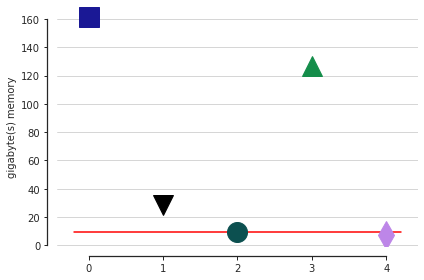

In [113]:
# We are interested in the speed up and efficiency of each of the aligners
# y-axis: RAM Usage
# x-axis: N (workers)
# sns.set_style("whitegrid")
with plt.style.context(('seaborn-ticks')):
    fig, ax = plt.subplots()
# sns.pointplot(x="tool", y="gbyte_memory", data=df, ax=ax)

for index, row in df_means.iterrows():
    ax.plot([row.index_tools], [row.gbyte_memory], marker=row.markers, color=row.colors, markersize=20, label=row.display_names)
#     ax.annotate("%.1f" % row.gbyte_memory, (row.index_tools, row.gbyte_memory), verticalalignment="bottom")

ax.yaxis.grid(True)
ax.xaxis.grid(False)

ax.get_xlim()
ax.plot(ax.get_xlim(), [infile_gbytes]*2, 'r', label='input file size', zorder=0)

stylize_axes(ax)
stylize_fig(fig)

pltname = "ram_bar"
plt.ylabel("gigabyte(s) memory")
plt.tight_layout()
plt.show()